<a href="https://colab.research.google.com/github/Harsh-Yadav73/Image-Enhancement/blob/main/DATASET2_LUNGS_CANCER_DETECTION_canny_edge_detection_PROJECT_EXCEPTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshyadavit","key":"f4a80cad833a7bc00ea16273dd07fe43"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance         Student Habits vs Academic Performance               19KB  2025-04-12 10:49:08          27720        486  1.0              
adilshamim8/social-media-addiction-vs-relationships          Students' Social Media Addiction                      8KB  2025-05-10 14:38:02           3967         61  1.0              
adilshamim8/cost-of-international-education                  Cost of International Education                      19KB  2025-05-07 15:41:53           5997        101  1.0              
aryan208/student-habits-and-academic-performance-dataset     Student Habits

In [ ]:
! kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images
License(s): CC-BY-SA-4.0
100% 1.76G/1.76G [01:20<00:00, 21.2MB/s]
100% 1.76G/1.76G [01:20<00:00, 23.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/lung-and-colon-cancer-histopathological-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
DATADIR='/content/lung_colon_image_set/lung_image_sets'    #BASE DIRECTORIES
CATEGORIES=['lung_aca','lung_n','lung_scc']

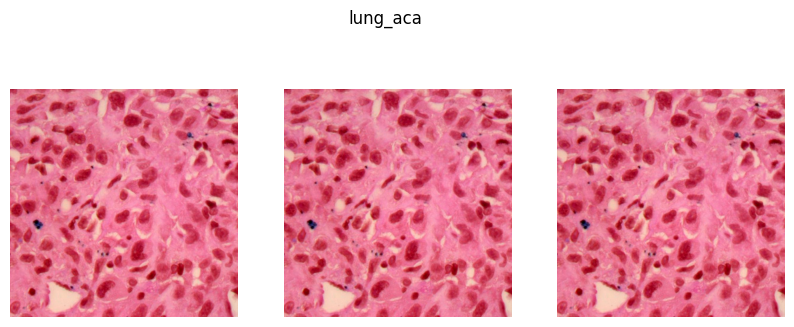

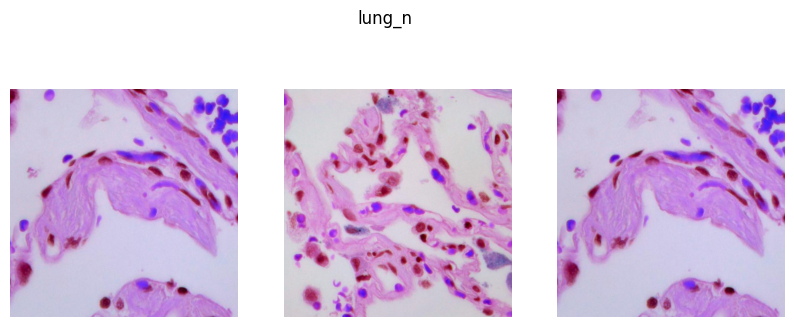

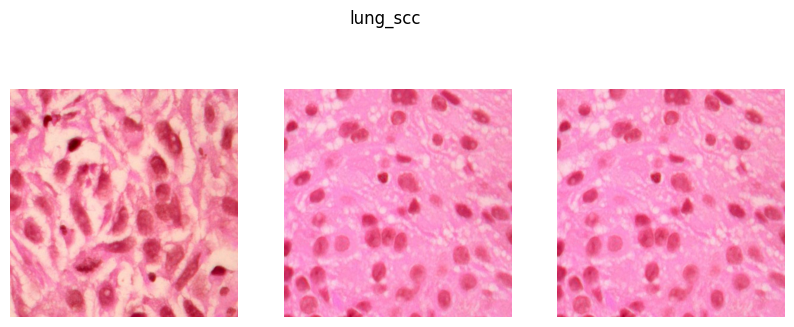

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
for cat in CATEGORIES:
  path=os.path.join(DATADIR,cat)    #CONSTRUCTING THE PATH
  images=os.listdir(path)
  fig, ax = plt.subplots(1,3, figsize=(10,4))
  fig.suptitle = plt.suptitle(cat)
  for i in  range(3):
    img_name=images[np.random.randint(0,len(images)/1500)]
    imgpath=os.path.join(path,img_name)
    imgarr = cv2.imread(imgpath)
    ax[i].imshow(imgarr)
    ax[i].axis('off')



In [ ]:
imgarr.shape

(768, 768, 3)

(224, 224, 3)

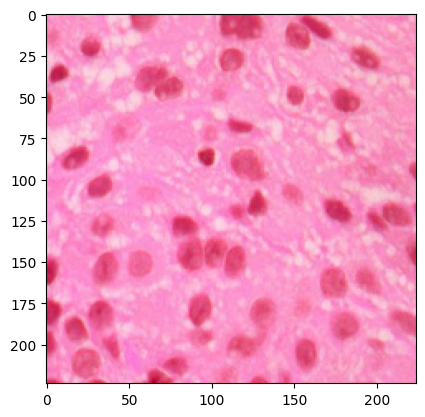

In [ ]:
img_size=224
new_array=cv2.resize(imgarr,(img_size,img_size))
plt.imshow(new_array)
new_array.shape

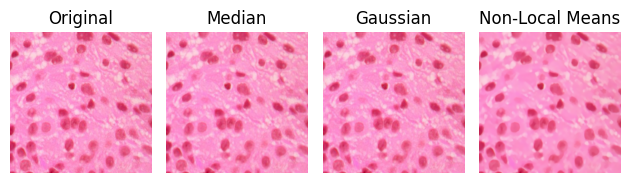

In [ ]:
# Median Filtering
median = cv2.medianBlur(imgarr, 5)

# Gaussian Filtering
gaussian = cv2.GaussianBlur(imgarr, (5, 5), 0)

# Non-Local Means Denoising
nlm = cv2.fastNlMeansDenoising(imgarr, None, h=10, templateWindowSize=7, searchWindowSize=21)

# Display Results
titles = ['Original', 'Median', 'Gaussian', 'Non-Local Means']
images = [imgarr, median, gaussian, nlm]

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


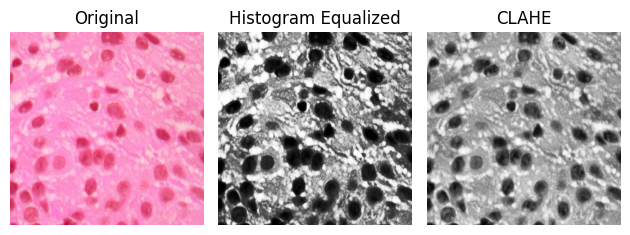

In [ ]:
# CONTRAST ENHANCEMENT
# 1. Global Histogram Equalization
# Convert the image to grayscale before applying histogram equalization
gray_img = cv2.cvtColor(imgarr, cv2.COLOR_BGR2GRAY)
hist_eq = cv2.equalizeHist(gray_img)

# 2. CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray_img) # Apply CLAHE to the grayscale image

# Display images
titles = ['Original', 'Histogram Equalized', 'CLAHE']
images = [imgarr, hist_eq, clahe_img]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray') # Use cmap='gray' for grayscale images
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

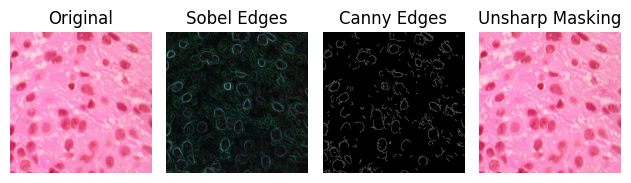

In [ ]:
# EDGE ENHANCEMENT
# 1. Sobel Edge Detection
sobel_x = cv2.Sobel(imgarr, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(imgarr, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)
sobel = cv2.convertScaleAbs(sobel)

# 2. Canny Edge Detection
canny = cv2.Canny(imgarr, 50, 100)

# 3. Unsharp Masking (Sharpening)
gaussian_blur = cv2.GaussianBlur(imgarr, (9, 9), 10.0)
unsharp = cv2.addWeighted(imgarr, 1.5, gaussian_blur, -0.5, 0)

# Display all images
titles = ['Original', 'Sobel Edges', 'Canny Edges', 'Unsharp Masking']
images = [imgarr, sobel, canny, unsharp]

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

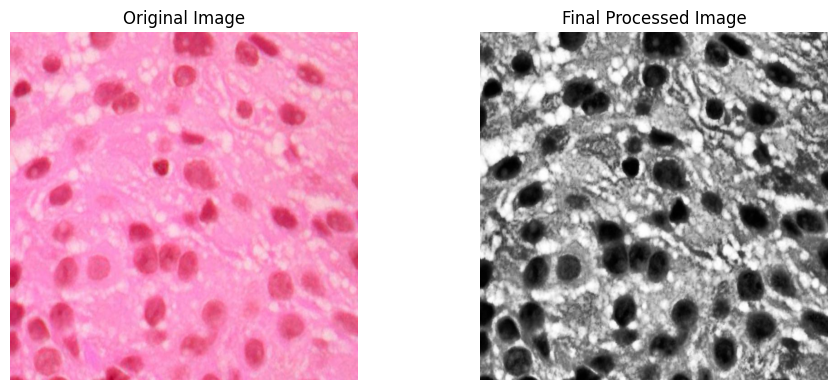

In [ ]:
# Step 1: Median Filtering
median = cv2.medianBlur(imgarr, 5)

# Step 2: Histogram Equalization
gray_img = cv2.cvtColor(imgarr, cv2.COLOR_BGR2GRAY) # Convert to grayscale
hist_eq = cv2.equalizeHist(gray_img) # Apply equalization to grayscale image

# Step 3: CLAHE (Local Contrast Enhancement)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(hist_eq)

# Step 4: Morphological Opening and Closing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)) # Define kernel
morph_open = cv2.morphologyEx(clahe_img, cv2.MORPH_OPEN, kernel)
final_result = cv2.morphologyEx(morph_open, cv2.MORPH_CLOSE, kernel)

# Display original and final processed image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(imgarr, cmap='gray') # Display original image (imgarr)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title('Final Processed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 10, 10, 2048)        │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,485,995 (89.59 MB)

 Trainable params: 2,624,515 (10.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 167s 393ms/step - accuracy: 0.7527 - loss: 0.5605 - val_accuracy: 0.8547 - val_loss: 0.3434
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 152s 404ms/step - accuracy: 0.8676 - loss: 0.3151 - val_accuracy: 0.8803 - val_loss: 0.2732
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 135s 359ms/step - accuracy: 0.8913 - loss: 0.2634 - val_accuracy: 0.8863 - val_loss: 0.2667
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 135s 359ms/step - accuracy: 0.8942 - loss: 0.2485 - val_accuracy: 0.8830 - val_loss: 0.2674
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 147s 392ms/step - accuracy: 0.9024 - loss: 0.2294 - val_accuracy: 0.8593 - val_loss: 0.3256
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 137s 365ms/step - accuracy: 0.9054 - loss: 0.2297 - val_accuracy: 0.8670 - val_loss: 0.3506
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 147s 391ms/step - accuracy: 0.9099 - loss: 0.2136 - val_accuracy: 0.9040 - val_loss: 0.2249
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 136s 361ms/step - accuracy: 0.9264 -

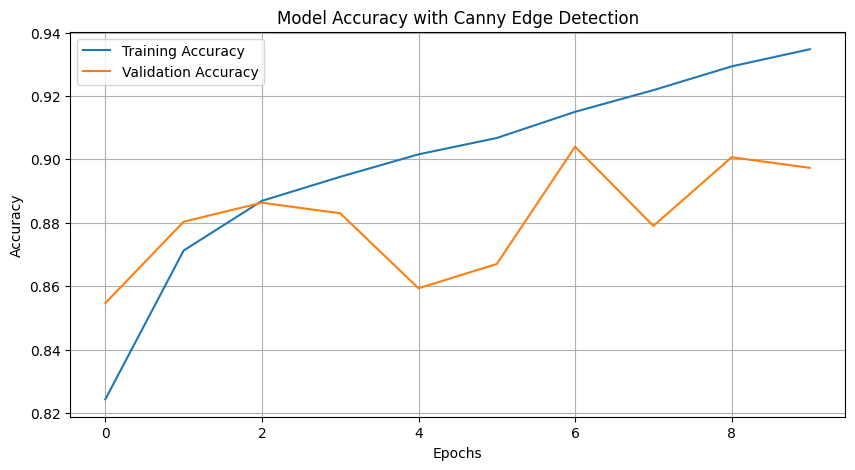

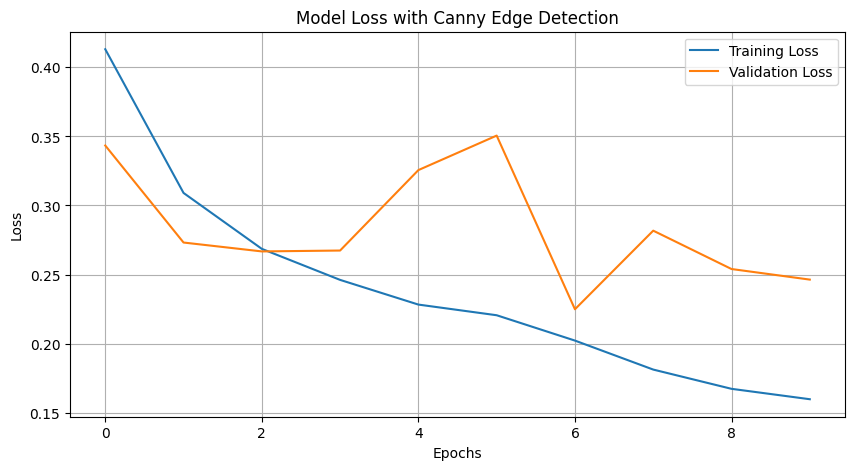

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Constants
img_size = 299
batch_size = 32
DATADIR = '/content/lung_colon_image_set/lung_image_sets'
CATEGORIES = ['lung_aca', 'lung_n', 'lung_scc']

# Load image paths and labels
image_paths = []
labels = []

for idx, category in enumerate(CATEGORIES):
    folder_path = os.path.join(DATADIR, category)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(idx)

# Train/Validation split
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42
)

# Custom Canny Edge Detection Generator
class CannyDataGenerator(Sequence):
    def __init__(self, image_paths, labels, batch_size, img_size, shuffle=True):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_paths = self.image_paths[index * self.batch_size:(index + 1) * self.batch_size]
        batch_labels = self.labels[index * self.batch_size:(index + 1) * self.batch_size]

        images = []
        for path in batch_paths:
            img = cv2.imread(path)
            if img is None:
                continue
            img = cv2.resize(img, (self.img_size, self.img_size))

            # Convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Apply Canny edge detection
            edges = cv2.Canny(gray, threshold1=100, threshold2=200)

            # Convert to 3 channels
            edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

            images.append(edges_rgb / 255.0)  # Normalize

        return np.array(images), np.array(batch_labels)

    def on_epoch_end(self):
        if self.shuffle:
            combined = list(zip(self.image_paths, self.labels))
            np.random.shuffle(combined)
            self.image_paths, self.labels = zip(*combined)

# Initialize generators
train_generator = CannyDataGenerator(train_paths, train_labels, batch_size, img_size)
val_generator = CannyDataGenerator(val_paths, val_labels, batch_size, img_size, shuffle=False)

# Load Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy with Canny Edge Detection")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss with Canny Edge Detection")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])


Final Training Accuracy: 0.9347500205039978
Final Validation Accuracy: 0.8973333239555359


In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation accuracy: {accuracy * 100:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 293ms/step - accuracy: 0.9032 - loss: 0.2295
Validation accuracy: 89.73%


In [ ]:
loss, test_accuracy = model.evaluate(val_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 278ms/step - accuracy: 0.9032 - loss: 0.2295
Test accuracy: 89.73%


In [ ]:
# Predict probabilities for all samples in the validation/test set
pred_probs = model.predict(val_generator)

# Get the predicted class labels (indexes) by taking the argmax of probabilities
pred_classes = np.argmax(pred_probs, axis=1)

print(pred_classes[:10])  # Print first 10 predicted classes


94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 326ms/step
[1 1 0 0 0 0 0 2 0 1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

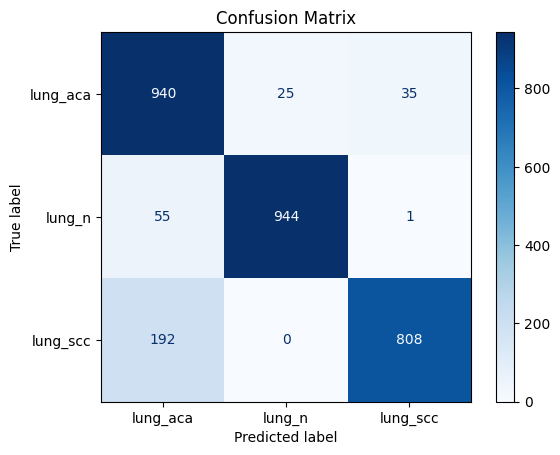

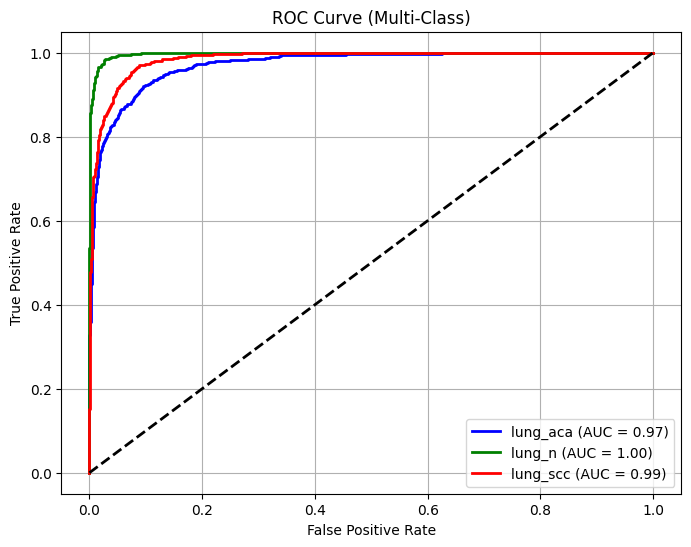

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Step 1: Get true labels and predicted probabilities
y_true = []
y_pred_proba = []

for batch_images, batch_labels in val_generator:
    preds = model.predict(batch_images)
    y_true.extend(batch_labels)
    y_pred_proba.extend(preds)

    # Stop once full validation set is covered
    if len(y_true) >= len(val_labels):
        break

y_true = np.array(y_true)
y_pred_proba = np.array(y_pred_proba)
y_pred = np.argmax(y_pred_proba, axis=1)

# Step 2: Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CATEGORIES)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Step 3: ROC Curve (for multi-class)
y_true_cat = to_categorical(y_true, num_classes=len(CATEGORIES))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(CATEGORIES)):
    fpr[i], tpr[i], _ = roc_curve(y_true_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"{CATEGORIES[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
